In [28]:
import numpy as np
#from numba import cuda
import matplotlib.pyplot as plt

# Classes #

In [29]:
#parent class for animals
class Animal:
  def __init__ (self, hungerRate, birthRate, maxLife, moveSpeed, speedModifier, xPosition, yPosition):
    # self.id=id
    self.hungerRate=hungerRate
    self.birthRate=birthRate
    self.maxLife=maxLife
    self.moveSpeed=moveSpeed
    self.speedModifier=speedModifier
    self.xPosition=xPosition
    self.yPosition=yPosition

  def die(self):
        self.xPosition=-1
        self.yPosition=-1
        print("oof")
    
  def breed(self):
      print("Did you come from a vending machine bc you're a snack")
    
  def move(self):
    """TODO: Correctly calculate and return the correct move speed"""
    self.totalMove=self.moveSpeed*self.speedModifier
    print("I moved {self.totalMove} spaces!")

  def __str__(self):
    return f"id:{self.id}, position:({self.xPosition},{self.yPosition}), hungerRate:{self.hungerRate}, breedRate:{self.birthRate}, maxLife:{self.maxLife}, moveSpeed:{self.moveSpeed}, speedModifier:{self.speedModifier}"

In [30]:
#class for prey
class Sheep(Animal):
    def __init__ (self, hungerRate, birthRate, maxLife, moveSpeed, speedModifier, xPosition, yPosition):
        super().__init__(hungerRate, birthRate, maxLife, moveSpeed, speedModifier, xPosition, yPosition)
    
    def eat(self):
        print("yum!")

In [31]:
#class for predator
class Wolf(Animal):
    def __init__ (self, hungerRate, birthRate, maxLife, moveSpeed, speedModifier, xPosition, yPosition):
        super().__init__(hungerRate, birthRate, maxLife, moveSpeed, speedModifier, xPosition, yPosition)
    
    def eat(self):
        print("yummy!")

In [32]:
#class for each grid spot
class Grass:
  def __init__(self, hasFood, growthRate, myAnimal):
    self.hasFood= hasFood
    self.growthRate= growthRate
    self.myAnimal= myAnimal
  
  def __str__(self):
    return f"growthrate = {self.growthRate}"

# Serial Simulation #

In [26]:
def Simulation():
    #Initialize Field
    GridsizeX = 5
    GridSizeY = 5
    Grid = np.empty([GridsizeX,GridSizeY], dtype= Grass)

    #Initialize Grass in each field

    hasFood = True
    growthRate = 1.0
    myAnimal = None

    for i in range(GridsizeX):
        for j in range(GridSizeY):
            Grid[i][j] = Grass(hasFood,growthRate,myAnimal)

    #Initialize Prey
    preySize = 10

    preyArr = np.empty([preySize], dtype=Sheep)

    hungerRate = 1
    birthRate = 1 
    maxLife = 10
    moveSpeed = 1
    speedModifier = 1

    for i in range(preySize):
        xPosition = i
        yPosition = i
        preyArr[i] = Sheep(ungerRate, birthRate, maxLife, moveSpeed, speedModifier, xPosition, yPosition)
    


    #Initialize Predator
    predatorSize = 5     

    predatorArr = np.empty([predatorSize], dtype=Wolf)

    hungerRate = 1
    birthRate = 1 
    maxLife = 10
    moveSpeed = 1
    speedModifier = 1

    for i in range(preySize):
        xPosition = 5-i
        yPosition = 5-i
        preyArr[i] = Sheep(ungerRate, birthRate, maxLife, moveSpeed, speedModifier, xPosition, yPosition)
        

growthrate = 1.0


# CUDA Kernel #

In [ ]:
@cuda.jit
def Prey_Predator(grid_size, prey_size, predator_size):
    # Thread id in a 1D block
    # Simulation ID
    id = cuda.threadIdx.x
    
    # # Block id in a 1D grid
    # ty = cuda.blockIdx.x
    # # Block width, i.e. number of threads per block
    # bw = cuda.blockDim.x
    # # Compute flattened index inside the array
    # pos = tx + ty * bw



    # #shared array for results
    # prey_results = cuda.shared.array(num_simulations, int32)
    # predator_results = cuda.shared.array(num_simulations, int32)




    #after simulation
    dprey_results[id] = prey.population
    dpredator_results[id] = predator.population

    
    

In [ ]:
# only using 1 block but many threads
# number of threads
num_simulations = 32
num_block = 1

prey_results = np.empty([num_simulations],dtype= int)
predator_results = np.empty([num_simulations],dtype= int)

#copy to device
dprey_results = cuda.to_device(prey_results)
dpredator_results = cuda.to_device(predator_results)


#kernel call

grid_size = 10
prey_size = 1
predator_size = 2


Prey_Predator[num_block, num_simulations](grid_size, prey_size, predator_size)

#get results to host
prey_results = dprey_results.copy_to_host()
predator_results = dpredator_results.copy_to_host()

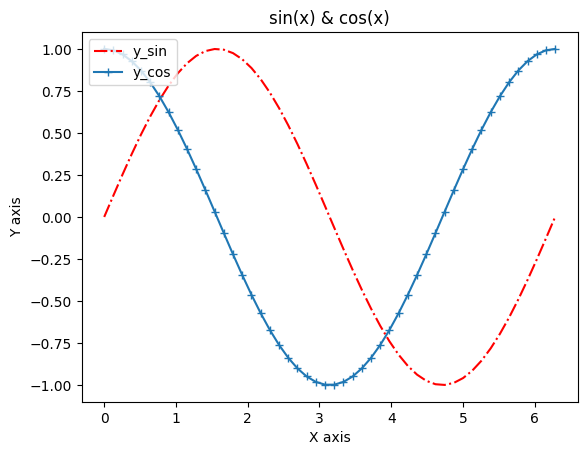

In [4]:
#plotting things


fig = plt.figure()
x = np.linspace(0, 2 * np.pi, 50)
y_sin = np.sin(x)
y_cos = np.cos(x)
plt.title('sin(x) & cos(x)')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.plot(x, y_sin, color = "red", linewidth = 1.5, linestyle = "-.", label = "y_sin")
plt.plot(x, y_cos, marker = '+', linestyle = '-', label = 'y_cos')
plt.legend(loc = "upper left")
plt.show()